# Query.py Tutorial Doc

This tutorial shows you how to create, run, and make some basic plots from the DP1 and DP03 catalogs. 

The tutorial is split into two parts:
1. Creating and running queries
2. Plotting/summary print statements

For this tutotial, we'll be looking NEO objects. query.py contains a global dictionary that contains all searchable classes and their orbital parameters:

    "LPC": {"a_min": 50.0},
    "TNO": {"a_min": 30.1, "a_max": 50.0},
    "Ntrojan": {"a_min": 29.8, "a_max": 30.4},
    "NEO": {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0},
    "MBA": {"q_min": 1.66, "a_min": 2.0, "a_max": 3.2},
    "Centaur": {"a_min": 5.5, "a_max": 30.1},
    "Jtrojan": {"a_min": 4.8, "a_max": 5.4, "e_max": 0.3},
    "JFC": {"tj_min": 2.0, "tj_max": 3.0}

The 'catalog' variable allows you to query different catalogs; the options are 'dp03_catalogs_10yr' and'dp1'.

The 'join' variable allows you to perform an inner join with either 'DiaSource' or 'SSObject'.

## 1. Creating and Running queries

First, we will show you a full example, and then provide more query examples for your reference. 

The first set of examples will use DP1. The examples at the bottom will use DP03. 

In [2]:
from lsst.rsp import get_tap_service
import sys
import os
sys.path.append(os.path.abspath('../../sso_query/'))
import query as q
import plots as p
import pandas as pd

After generating your desired query, it's time to run it. All examples can be run by uncommeting the 'q.run_query' line of code. 

The run_query function can return either an AstroPy table (to_pandas = False) or a Pandas dataframe (to_pandas = True). 

The function automatically prints the first few rows of your data. 

### DP1 Examples
Because SSObject is a one-to-one match to the MPCORB catalog and DiaSource has multiple observations per object, note that the SSObject query will run much faster than the DiaSource query. 

When joining with DiaSource and SSObject, note the columns. Both tables have different columns in the DP03 and DP1 catalogs, be careful of this when plotting!

##### Ex 1: Class name provided, join with SSObject

In [3]:
string, class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "SSObject")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: Cutoffs provided, join with DiaSource

In [4]:
string, class_name = q.make_query(catalog = "dp1", class_name = None, cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}, join = "DiaSource")
print(f"Query:\n{string}")
print(f"Class: {class_name}")
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Class: NEO


### DP03 Examples

##### Ex 1: DP03, Class name provided, no join. 

In [5]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = None)
print(f"Query:\n{string}")
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: DP03, Class name provided, join table with DiaSource

In [6]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(f"Query:\n{string}")# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 3: DP03, Cutoffs provided, no join

In [7]:
NEO_cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}

string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = None)
print(f"Query:\n{string}")
print(f"Class: {class_name}")
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Class: NEO


##### Ex 4: DP03, Cutoffs provided, join with SSObject

In [8]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = "SSObject")
print(f"Query:\n{string}")
print(f"Class: {class_name}")
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']
Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Class: NEO


### Main Example: DP03, NEO, no join

**Note:** This takes ~7 seconds to run.

In [9]:
# Create the query
ex_string, ex_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = None)
print(f"Query:\n{ex_string}")

# Run the query
main_example_table = q.run_query(ex_string, ex_class_name, "dp03_catalogs_10yr", to_pandas = True)

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q/(1-mpc.e) > 50.0;
Job phase is COMPLETED


,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,0.241889,0.24548,1995 TL8,40.108974,-7944525109453944452,52.906462,LPC
1,0.583589,13.37535,1996 GQ2,38.253954,-3886486527644907484,91.865887,LPC
2,0.990750,30.01656,1996 PW,2.515064,-5355713017979579895,271.897019,LPC
3,0.583744,23.94357,1996 TL6,34.990001,-6402520081534125032,84.058927,LPC
4,0.432018,9.43327,1998 WA3,31.574146,-6039640083020148945,55.590058,LPC
5,0.416044,6.66065,1998 XY9,37.280751,6324308877180675314,63.841724,LPC
6,0.275482,18.79911,1999 CC1,38.809078,-7060151973142487230,53.565375,LPC
7,0.557470,19.73079,1999 CF1,38.668999,6782889296062225215,87.381669,LPC
8,0.288133,5.48727,1999 CV1,37.317829,1330358303458427228,52.422455,LPC
9,0.609359,25.62030,1999 CY1,34.592257,5462369825699935823,88.552478,LPC


## 2. Plotting + Summary Print Statements

The query_helpers.py module holds functions that create some useful summary plots and print statements. For our examples, we'll be looking at NEOs in the DP03 catalog. 

#### Main Example Plots

*Basic available plots.*

##### Orbital elements: a vs. e, a vs. i (scatter plots & heat maps)

Columns: ['e', 'incl', 'mpcDesignation', 'q', 'ssObjectID', 'a', 'class_name']


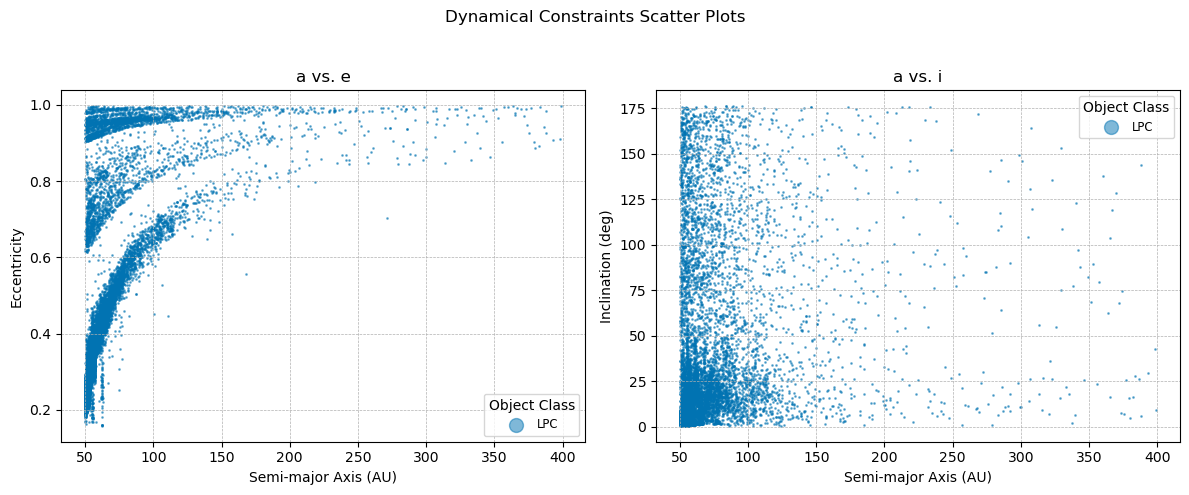

In [10]:
print(f"Columns: {[col for col in main_example_table.columns]}")

# qh.plot_data(main_example_table, log = True)

p.run_scatter_plots(main_example_table)

**Note:** Heat maps work best for a singular class, scatter plots (above) are recommended for multiple class plots

Data sets in DP03 and DP1 range from tens to millions of rows, so there are two optional arguments for run_heat_maps (for aesthetic purposes):
- Plot density in log scale, default False (log_scale:bool = False)
- Change density binning, defult 200 (bins:int = 200)

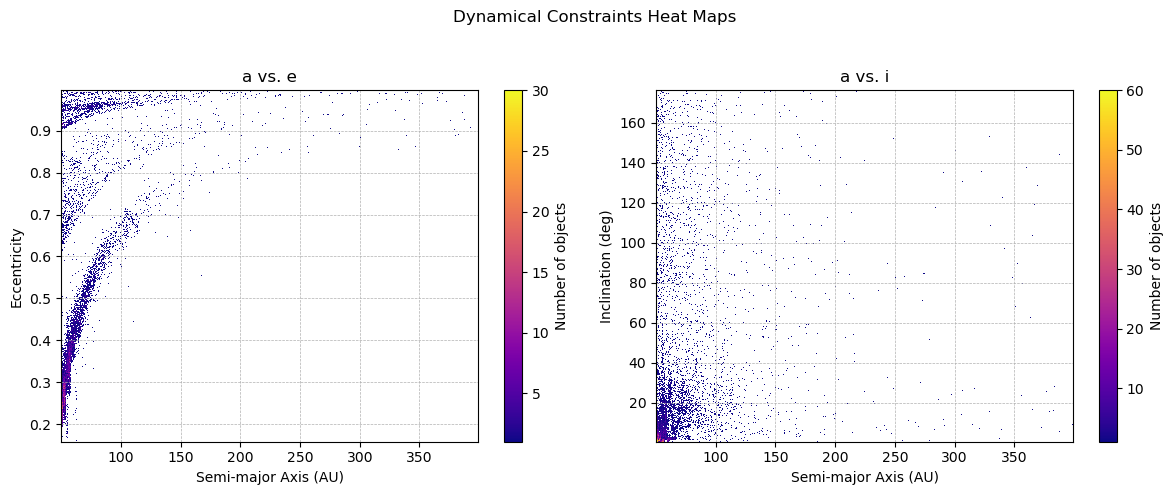

In [11]:
p.run_heat_maps(main_example_table, bins=500)

### Joined with DiaSource

#### Example: DP1, all classes, joined with DiaSource

*Type counts by class, unique object, and filter & magnitude band data.*

**Note:** As this is the entire DP1 catalog joined with DiaSource, it takes 1 minute and ~15 seconds to run.

In [12]:
# Entire DP1 catalog

# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(NEO_string)
LPC_string, LPC_class_name = q.make_query(catalog = "dp1", class_name = "LPC", cutoffs = None, join = "DiaSource")
print(LPC_string)
TNO_string, TNO_class_name = q.make_query(catalog = "dp1", class_name = "TNO", cutoffs = None, join = "DiaSource")
Ntrojan_string, Ntrojan_class_name = q.make_query(catalog = "dp1", class_name = "Ntrojan", cutoffs = None, join = "DiaSource")
MBA_string, MBA_class_name = q.make_query(catalog = "dp1", class_name = "MBA", cutoffs = None, join = "DiaSource")
Centaur_string, Centaur_class_name = q.make_query(catalog = "dp1", class_name = "Centaur", cutoffs = None, join = "DiaSource")
Jtrojan_string, Jtrojan_class_name = q.make_query(catalog = "dp1", class_name = "Jtrojan", cutoffs = None, join = "DiaSource")
JFC_string, JFC_class_name = q.make_query(catalog = "dp1", class_name = "JFC", cutoffs = None, join = "DiaSource")


# run the query
NEO = q.run_query(NEO_string, NEO_class_name, "dp1", to_pandas = True)
LPC = q.run_query(LPC_string, LPC_class_name, "dp1", to_pandas = True)
TNO = q.run_query(TNO_string, TNO_class_name, "dp1", to_pandas = True)
Ntrojan = q.run_query(Ntrojan_string, Ntrojan_class_name, "dp1", to_pandas = True)
MBA = q.run_query(MBA_string, MBA_class_name, "dp1", to_pandas = True)
Centaur = q.run_query(Centaur_string, Centaur_class_name, "dp1", to_pandas = True)
Jtrojan = q.run_query(Jtrojan_string, Jtrojan_class_name, "dp1", to_pandas = True)
JFC = q.run_query(JFC_string, JFC_class_name, "dp1", to_pandas = True)


main_example_table = p.combine_tables(NEO, LPC, TNO, Ntrojan, MBA, Centaur, Jtrojan, JFC)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0;
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr',

,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,137561.000000,464.989014,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
1,143463.000000,498.498993,False,g,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
2,240864.000000,609.564026,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
3,217844.000000,670.518005,False,r,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
4,278750.000000,923.974976,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
5,272183.000000,862.742981,False,i,0.173054,18.283831,2023 UN9,0.808130,21165819307243854,0.977247,NEO
6,6255.779785,686.778015,False,i,0.383285,38.956723,2009 VA26,0.933121,21163646070699585,1.513052,NEO
7,3186.149902,357.355011,False,r,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
8,2229.699951,261.351013,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO
9,1997.040039,262.979004,False,g,0.544695,33.705677,2002 FB6,0.818067,21163615737361986,1.796745,NEO


Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,-874.994019,1495.380005,False,z,0.069491,9.455032,2006 FM26,2.820176,21163632917362253,3.030787,MBA
1,147.177994,1548.069946,False,z,0.069491,9.455032,2006 FM26,2.820176,21163632917362253,3.030787,MBA
2,90370.601562,534.776001,False,r,0.178761,4.836133,2001 SQ248,1.812507,21163611662530641,2.207039,MBA
3,104010.000000,755.590027,False,i,0.178761,4.836133,2001 SQ248,1.812507,21163611662530641,2.207039,MBA
4,8817.129883,696.880005,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,MBA
5,8743.540039,685.450989,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,MBA
6,996008.000000,1147.569946,False,i,0.101921,4.840250,1985 VE,2.089647,20890950007009349,2.326797,MBA
7,856177.000000,873.273010,False,r,0.101921,4.840250,1985 VE,2.089647,20890950007009349,2.326797,MBA
8,7057.709961,463.082001,False,r,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,MBA
9,8746.809570,681.174011,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,MBA


Job phase is COMPLETED
ValueError: Results table is empty or None. Check input cutoffs.
Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,634.669983,1545.760010,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
1,3713.550049,1528.229980,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
2,18111.599609,569.603027,False,r,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
3,11150.099609,517.268005,False,g,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
4,-1352.910034,1533.650024,False,z,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
5,19119.099609,572.033997,False,r,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan
6,11526.700195,515.210022,False,g,0.099885,7.709743,2005 XK5,4.731688,21163628924253515,5.256759,Jtrojan


Job phase is COMPLETED


,apFlux,apFluxErr,apFlux_flag,band,e,incl,mpcDesignation,q,ssObjectID,a,class_name
0,2.387130e+00,1578.000000,False,z,0.132361,6.231887,2005 CB44,2.688598,21163628572193858,3.098754,JFC
1,3.295100e+02,1581.719971,False,z,0.132361,6.231887,2005 CB44,2.688598,21163628572193858,3.098754,JFC
2,5.625210e+03,394.316010,False,g,0.102718,10.418573,2015 BJ544,2.822970,21164728071173194,3.146134,JFC
3,8.817130e+03,696.880005,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
4,8.743540e+03,685.450989,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
5,7.057710e+03,463.082001,False,r,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
6,8.746810e+03,681.174011,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
7,6.920600e+03,466.721985,False,r,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
8,7.780360e+03,713.872009,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC
9,9.207020e+03,722.546997,False,i,0.120666,27.660986,2024 WG104,2.706866,23133931615302199,3.078312,JFC


##### Observations per type:

In [13]:
obs_per_type_counts = p.obs_type_counts(main_example_table)

class_name
MBA        5217
JFC        1630
NEO          23
Jtrojan       7
Name: count, dtype: int64


>>>>>>> remote <removed>


##### Observations per unique object:

In [14]:
obs_per_unique_object_counts = p.obs_unique_obj_counts(main_example_table)

            ssObjectID class_name  obs_count
0    20890932542191434        MBA          3
1    20890945661711695        MBA          8
2    20890950007009348        JFC          6
3    20890950007009348        MBA          6
4    20890950007009349        MBA         19
..                 ...        ...        ...
503  23133931615303984        MBA         13
504  23133931615303985        MBA          8
505  23133931615303986        JFC         10
506  23700330477793593        JFC         18
507  23700330477793593        MBA         18

[508 rows x 3 columns]


##### Number of each type in DP1:

In [17]:
obj_count_per_class_type = p.type_counts(main_example_table)

  class_name  object_count
0        JFC           113
1    Jtrojan             1
2        MBA           391
3        NEO             3


##### Observations per object, by filter:

In [18]:
observations_by_object_filter = p.obs_filter(main_example_table)

# of observations by Object: ssObjectID
21163637482928473    160
21164728252512342    132
23133931615301687     64
23133931615301942     60
23133931615301943     60
                    ... 
21164723924251475      1
21163641456899922      1
21164719762453330      1
21163646070699585      1
21165810483998787      1
Name: count, Length: 409, dtype: int64
# of observations by Filter: band
i    2489
g    2201
r    1739
z     422
u      26
Name: count, dtype: int64
# of unique observations for each unique object, by filter:              ssObjectID band  obs_filter_count
0     20890932542191434    r                 1
1     20890932542191434    z                 2
2     20890945661711695    g                 2
3     20890945661711695    r                 2
4     20890945661711695    z                 4
...                 ...  ...               ...
1119  23133931615303986    g                 6
1120  23133931615303986    r                 4
1121  23700330477793593    g                 8
1122  

##### Magnitude Range plot:

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Standard Deviation of Range: 1.3352724313735962
Mean Range: 1.7116103
Large range criterion: 3.0468826


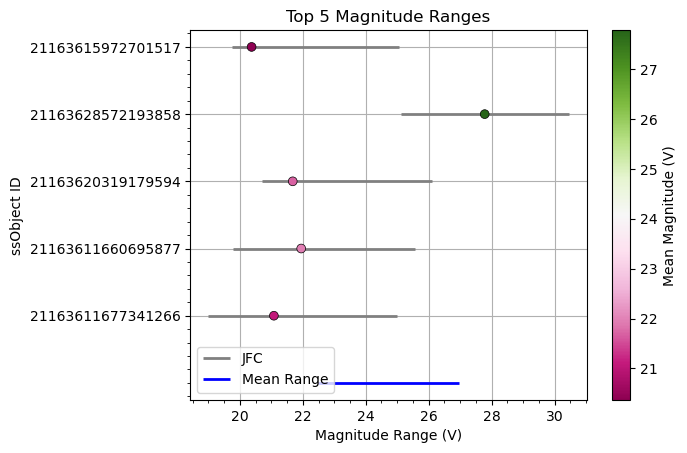

Standard Deviation of Range: 0.4106866717338562
Mean Range: 0.5713711
Large range criterion: 0.98205775
Large range criterion removed all or too many objects — skipping filter.


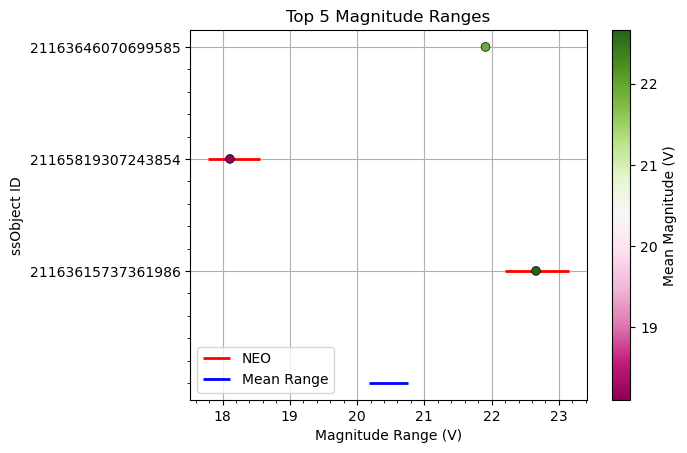

In [19]:
# need to add magnitude columns
JFC_mags = q.calc_magnitude(JFC['apFlux'])
JFC['magTrueVband'] = JFC_mags
JFC_ex_with_mags = p.data_grouped_mags(JFC)
p.mag_range_plot(JFC_ex_with_mags, head_number = 5)

NEO_mags = q.calc_magnitude(NEO['apFlux'])
NEO['magTrueVband'] = NEO_mags
NEO_ex_with_mags = p.data_grouped_mags(NEO)
p.mag_range_plot(NEO_ex_with_mags, head_number = 5)

### Joined with SSObject

#### Example: DP1, MBA, joined with SSObject

*Discovery status (new vs. known objects) & basic plotting.*

In [20]:
# Create the MBA query
MBA_string, MBA_class_name = q.make_query(catalog = "dp1", class_name = "MBA", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{MBA_string}")

# Run the MBA query
MBA_data_table = q.run_query(MBA_string, MBA_class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q > 1.66 AND mpc.q/(1-mpc.e) > 2.0 AND mpc.q/(1-mpc.e) < 3.2;
Job phase is COMPLETED


,discoverySubmissionDate,e,incl,mpcDesignation,numObs,q,ssObjectID,a,class_name
0,NaN,0.085083,6.172520,1981 EJ47,3,2.214434,20890932542191434,2.420366,MBA
1,NaN,0.123997,4.667199,1984 SO5,8,2.352472,20890945661711695,2.685462,MBA
2,NaN,0.156926,5.621222,1985 VD,6,2.652810,20890950007009348,3.146592,MBA
3,NaN,0.101921,4.840250,1985 VE,19,2.089647,20890950007009349,2.326797,MBA
4,NaN,0.115775,5.202303,1991 SJ,11,1.942957,20892032288436298,2.197356,MBA
5,NaN,0.233890,8.410585,1991 XC1,20,2.394301,20892032372322627,3.125272,MBA
6,NaN,0.131549,8.324338,1992 WM5,8,2.196971,20892036650513741,2.529758,MBA
7,NaN,0.259531,4.465311,1993 TR37,5,1.687654,20892040895346514,2.279169,MBA
8,NaN,0.036856,5.229717,1995 SP71,21,2.470180,20892049468764496,2.564704,MBA
9,NaN,0.063483,7.950412,1996 SH6,5,2.151422,20892053763274312,2.297258,MBA


##### Plot orbital data for MBAs

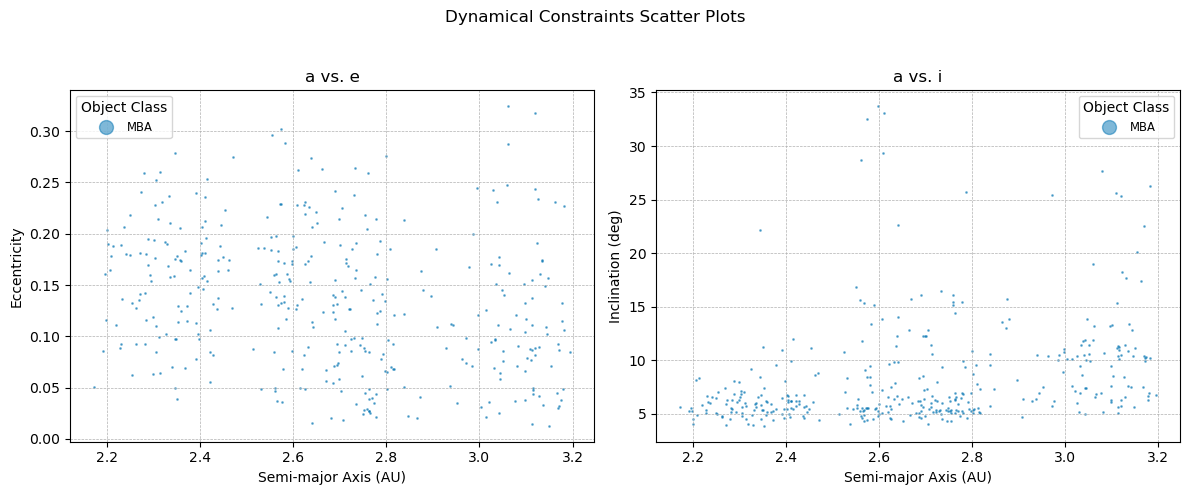

In [21]:
p.run_scatter_plots(MBA_data_table)

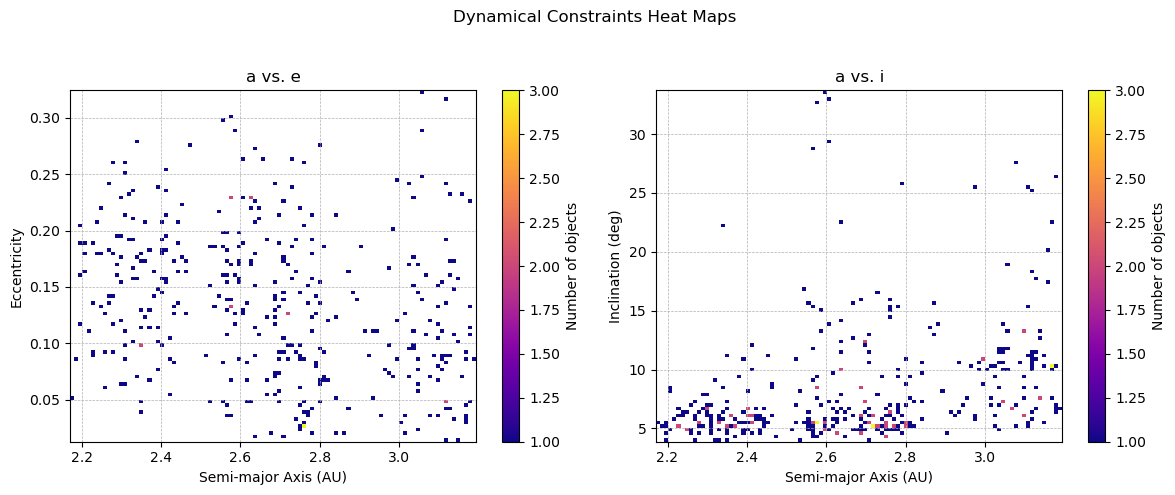

In [22]:
p.run_heat_maps(MBA_data_table, bins=100)

##### Plot Color Distribution

**Note:** SSObject plots will plot given the available information in the catalog (see schema browser: https://sdm-schemas.lsst.io).

For DP03 catalogs
- color data will be plotted (run_color_plots)
- all data is synthetic so 'new vs. known' plots are not useful, all objects are "new" (have a synthetic discovery submission date value)

For DP1
- color data is not available --> not plotted
- 'new vs. known' plots are accurate and differentiate between known objects and LSST discoveries (run_ssobject_plots)
- very few objects exist when joined with SSObject in DP1 as of now, plotting will print statements if desired columns are empty or missing values

**Note:** Discovery status plots will be separate if multiple classes exist in the DataFrame.

In [23]:
p.run_color_plot(MBA_data_table)

Columns do not exist in this table.


**Note:** This is an example of what will happen if columns do not exist in a catalog's schema.

##### Plot discovery status

Plotting new vs. known data (80 valid values, 299 NaNs skipped.


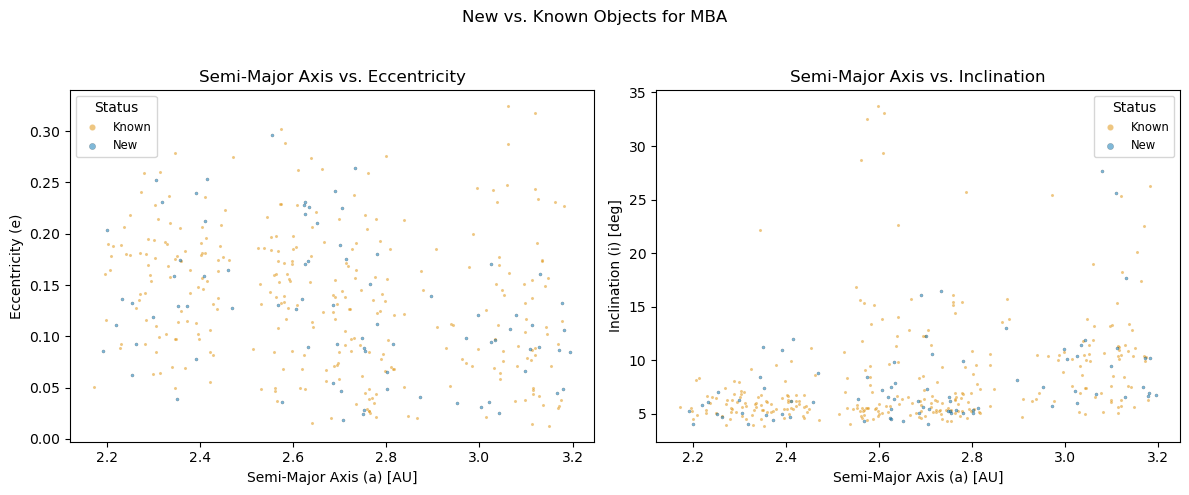

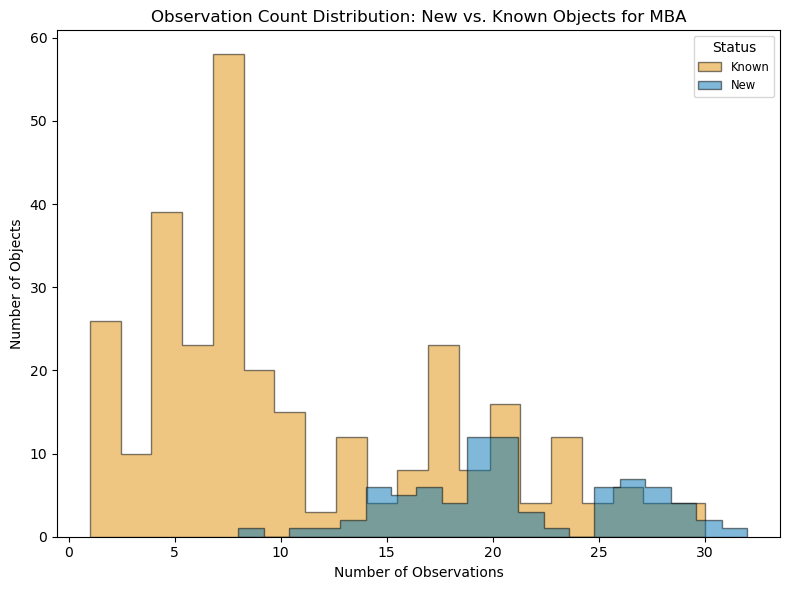

In [24]:
p.run_ssobject_plots(MBA_data_table)

**Note:** While these plots are availble for all objects in DP1, only MBAs have significant new discoveries as of now.

#### Example: DP03, NEO & LPC, joined with SSObject

*Color distrbution & comparative plotting.*

**Note:** DP03 catalog queries take ~10 seconds each to run when joined with SSObject due to the sheer volume of data

In [25]:
# Create the NEO query
NEO_string, NEO_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{NEO_string}")

# Run the NEO query
NEO_data_table = q.run_query(NEO_string, NEO_class_name, "dp03_catalogs_10yr", to_pandas = True)

# Create the LPC query
LPC_string, LPC_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = "SSObject")
print(f"\nQuery:\n{LPC_string}")

# Run the LPC query
LPC_data_table = q.run_query(LPC_string, LPC_class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60747.0,0.396081,13.476295,0.669659,12.608139,8.45061,1929 SH,59,1.123543,12.806637,0.198498,3351269693330531197,1.860420,NEO
1,60219.0,0.435987,18.141359,0.641882,17.297379,11.88325,1932 EA1,282,1.080947,17.499477,0.202099,-5234750409166262016,1.916528,NEO
2,60422.0,0.763999,19.550732,0.634323,18.710812,1.32170,1936 CA,254,0.441069,18.916409,0.205597,7991128850154218427,1.868924,NEO
3,60560.0,0.623179,18.261578,0.624949,17.455847,6.06758,1937 UB,156,0.622294,17.636629,0.180782,-7789613295760699323,1.651432,NEO
4,60224.0,0.712520,16.118109,0.659043,15.249735,2.52162,1947 XC,321,0.625595,15.459065,0.209331,8551587316774204226,2.176135,NEO
5,60236.0,0.436676,15.087029,0.661860,14.244156,9.38260,1948 OA,306,0.769900,14.425168,0.181012,-2686348740622689257,1.366710,NEO
6,62611.0,0.826915,17.456528,0.659622,16.667896,22.79956,1949 MA,240,0.186402,16.796906,0.129009,-4973461691235584486,1.076942,NEO
7,63488.0,0.506705,18.075974,0.659075,17.227503,12.17004,1950 DA,86,0.834799,17.416899,0.189396,-380759069841638484,1.692293,NEO
8,60276.0,0.487689,15.452276,0.647643,14.605020,52.09591,1950 KA,474,1.125272,14.804633,0.199614,-1854470688567756410,2.196461,NEO
9,61740.0,0.365596,14.528775,0.641419,13.706590,26.86821,1950 LA,193,1.083856,13.887356,0.180766,7033084508252373249,1.708465,NEO


Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Query:
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0;
Job phase is COMPLETED


,discoverySubmissionDate,e,g_H,g_r_color,i_H,incl,mpcDesignation,numObs,q,r_H,r_i_color,ssObjectID,a,class_name
0,60651.00000,0.241889,NaN,NaN,NaN,0.24548,1995 TL8,146,40.108974,NaN,NaN,-7944525109453944452,52.906462,LPC
1,60283.00000,0.583744,NaN,NaN,NaN,23.94357,1996 TL6,206,34.990001,NaN,NaN,-6402520081534125032,84.058927,LPC
2,60326.00000,0.416044,NaN,NaN,NaN,6.66065,1998 XY9,170,37.280751,NaN,NaN,6324308877180675314,63.841724,LPC
3,60752.00000,0.671871,NaN,NaN,NaN,27.80716,1999 CZ1,169,37.473294,NaN,NaN,-6226453271022381647,114.203063,LPC
4,60423.00000,0.253008,NaN,NaN,NaN,17.24666,1999 HW1,100,39.103885,NaN,NaN,-4645018287656921967,52.348484,LPC
5,61460.00000,0.388323,NaN,NaN,NaN,19.71189,2000 CQ1,251,34.501959,NaN,NaN,7472096793441060043,56.405525,LPC
6,61283.00000,0.508512,NaN,NaN,NaN,8.04635,2000 PH3,140,38.322209,NaN,NaN,4353850515725095742,77.971818,LPC
7,60281.00000,0.527686,NaN,NaN,NaN,7.85985,2000 YY1,379,29.869348,NaN,NaN,5231994874203142679,63.240505,LPC
8,60392.00000,0.613130,NaN,NaN,NaN,12.74053,2001 FZ1,289,32.401190,NaN,NaN,112273187498824986,83.752074,LPC
9,61166.00000,0.504241,NaN,NaN,NaN,15.34429,2001 KV7,373,34.347340,NaN,NaN,7563231297313977603,69.282354,LPC


##### Plot orbital data for NEOs and LPCs separately

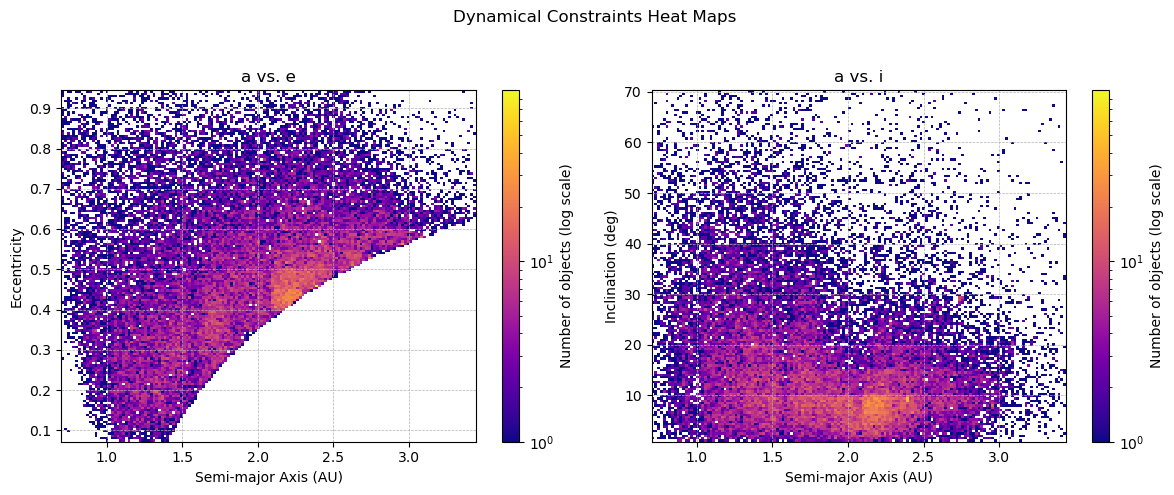

In [26]:
p.run_heat_maps(NEO_data_table, log_scale=True, bins=150)

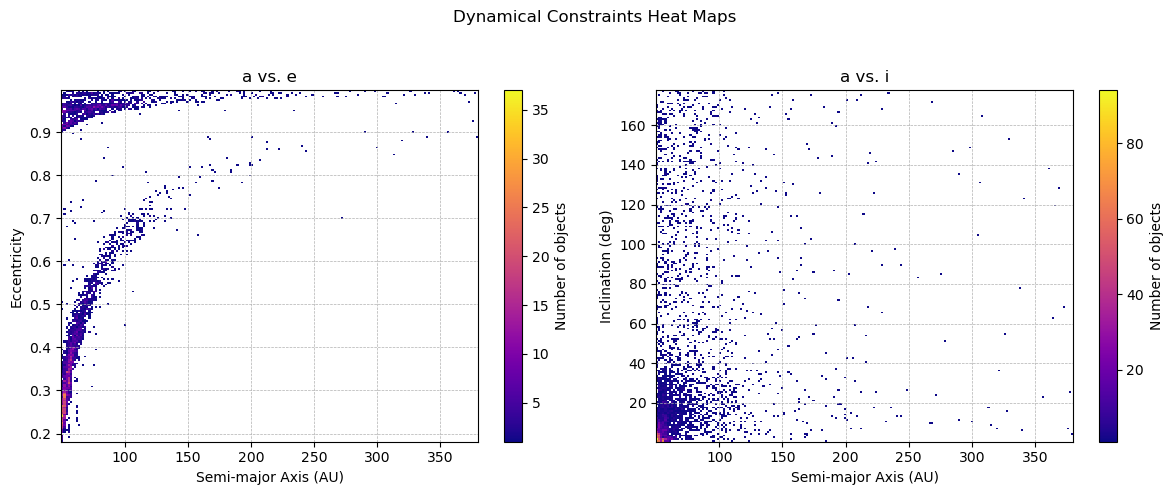

In [27]:
p.run_heat_maps(LPC_data_table)

##### Plot color distribution

Plotting color distributions (15839 valid values, 22467 NaNs skipped).


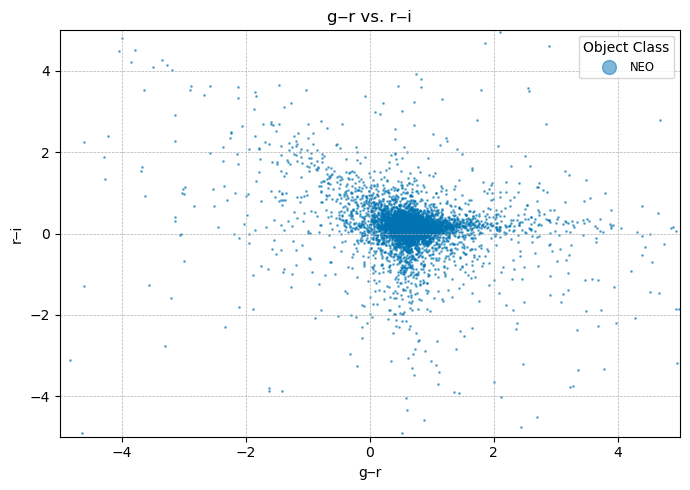

In [28]:
p.run_color_plot(NEO_data_table)

Plotting color distributions (821 valid values, 3553 NaNs skipped).


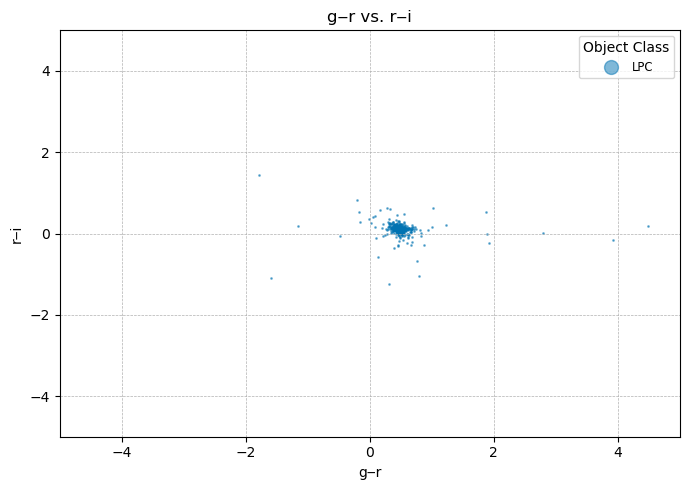

In [29]:
p.run_color_plot(LPC_data_table)

##### Combine the tables to plot comparisons 

In [30]:
sso_example_table = p.combine_tables(NEO_data_table, LPC_data_table)
print(f"Columns: {[col for col in sso_example_table.columns]}\n")
counts = p.type_counts(sso_example_table)

Columns: ['discoverySubmissionDate', 'e', 'g_H', 'g_r_color', 'i_H', 'incl', 'mpcDesignation', 'numObs', 'q', 'r_H', 'r_i_color', 'ssObjectID', 'a', 'class_name']

  class_name  object_count
0        LPC          4503
1        NEO         39470


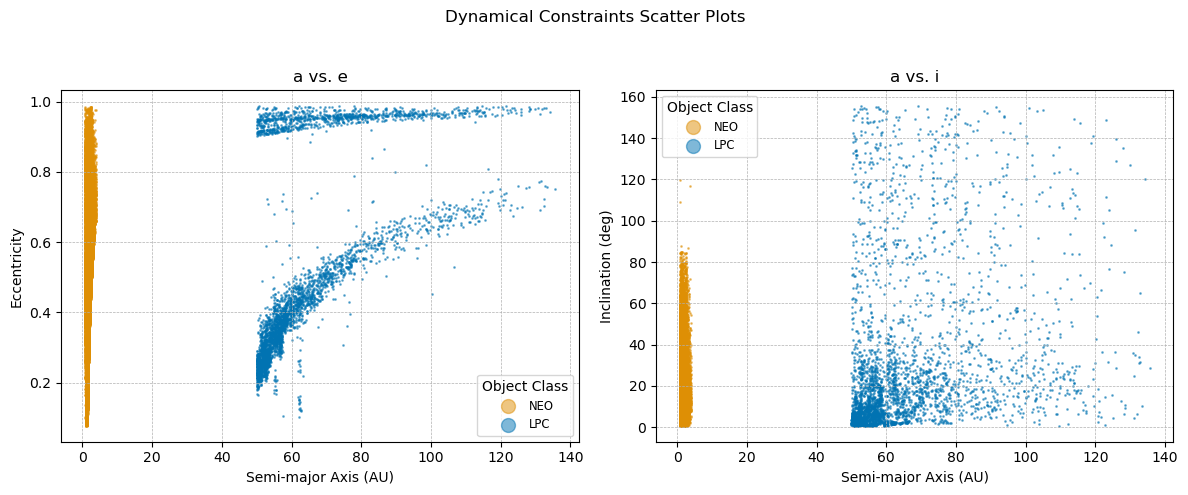

In [31]:
p.run_scatter_plots(sso_example_table)

Plotting orbital data for class 'LPC' (3933 valid values, 0 NaNs skipped).


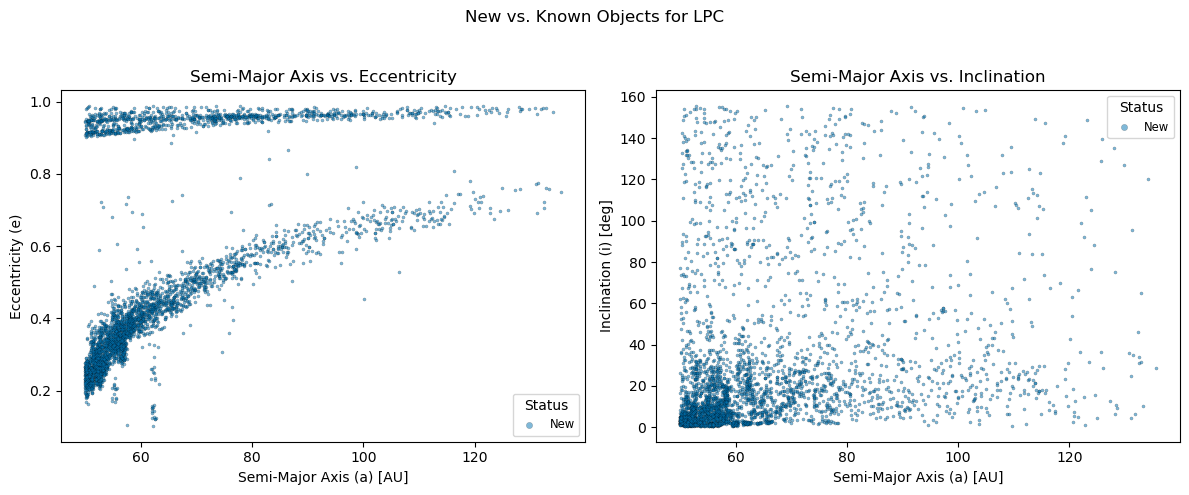

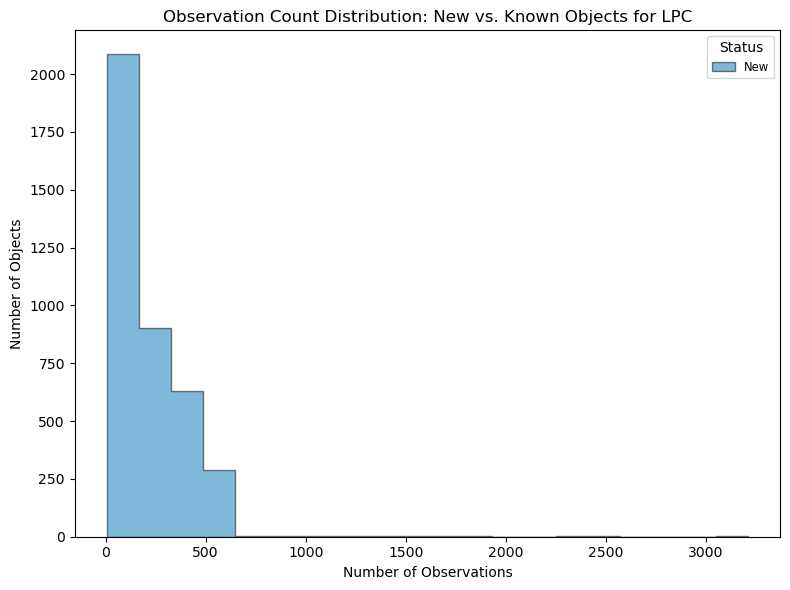

Plotting orbital data for class 'NEO' (38845 valid values, 0 NaNs skipped).


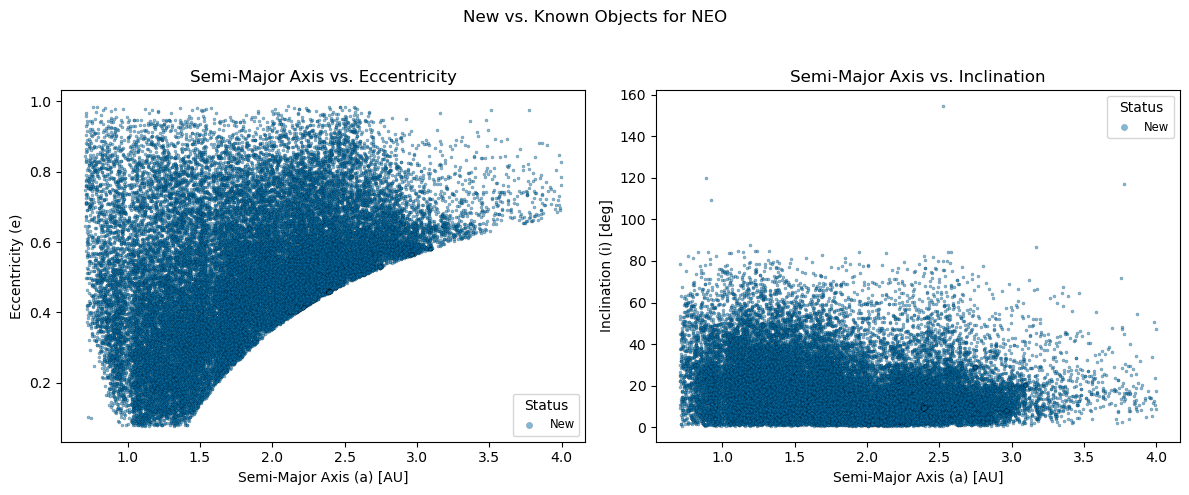

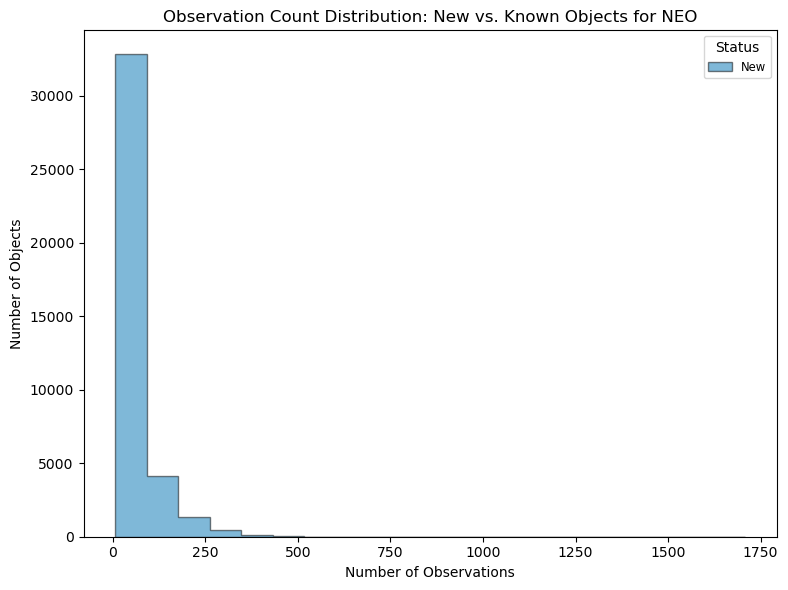

In [32]:
p.run_ssobject_plots(sso_example_table)